In [2]:
import numpy as np
import matplotlib.pyplot as plt

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
def prob(t):
    tau = 3.052*60
    return (1 - (2**((-t)/tau)))

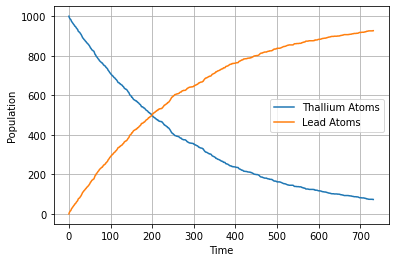

In [28]:
nT = 1000
nP = 0
tau = 3.052*60

T_list = [1000]
P_list = [0]

time_list = np.arange(0, int(4*tau))

for t in time_list[1:]:  #Since it is mentioned as each time step and each atom
    for atom in range(nT):
        rand_num = np.random.random()
        if rand_num <= prob(1):
            nT -= 1
            nP += 1

    T_list.append(nT)
    P_list.append(nP)

plt.plot(time_list, T_list, label='Thallium Atoms')
plt.plot(time_list, P_list, label='Lead Atoms')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()

1756.9974757312928


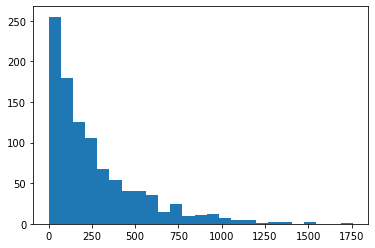

In [41]:
def expon_icdf(z, mu=60*3.052):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-z)/np.log(2)*mu

u = np.random.random(1000)
exp = expon_icdf(u)

plt.hist(exp, bins=25)
print(max(exp))

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [3]:
E = (7.7 * 10**6) * (1.6 * 10**-19)
a0 = 5.2917721067 * 10**(-11)
sigma = a0/100
Z = 79
e = 1.6 * 10**-19
epsilon = 8.854187817 * 10**-12

def theta(b):
    return 2* np.arctan( (Z * e**2) / (2 * np.pi * epsilon *  E * b))

In [4]:
beam = np.random.normal(0, sigma, size=(1000000, 2))
b = np.sqrt(beam[:, 0]**2 + beam[:, 1]**2)
th = theta(b)

In [5]:
cutoff = np.pi/2
th_bounced = th[abs(th)>cutoff]

print(len(th), len(th_bounced))

percent_bounced = len(th_bounced)/len(th) * 100
print(percent_bounced)

1000000 1608
0.1608


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [6]:
from scipy import integrate

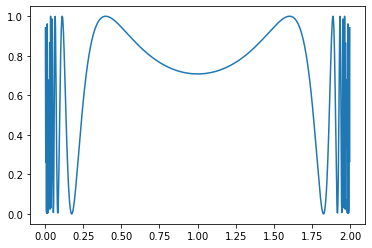

In [7]:
def f(x):
    return np.sin(1 / (x*(2-x)))**2

x = np.linspace(0, 2, 1000)[1:-1]
plt.plot(x, f(x))
plt.show()

In [8]:
#1: Hit or miss
N = 100000
count = 0
A = 2*1

for i in range(N):
    x = np.random.random()
    y = np.random.random()
    if y<f(x): count += 1

integral = (A*count)/N
print(integral)

actual_integral, abs_error = integrate.quad(f, 0, 2)
print(actual_integral)

error_hitmiss = abs(actual_integral - integral)
print(error_hitmiss)

1.45148
1.4516877509810684
0.0002077509810682887


C:\Users\Admin\AppData\Local\Temp\ipykernel_14380\2634691087.py:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  actual_integral, abs_error = integrate.quad(f, 0, 2)


In [9]:
#2: Mean Value
A = 2
x = np.linspace(0, 2, N+2)[1:-1]
print(len(x))

integral = (A/N)*sum(f(x))
print(integral)

error_mean = abs(integral - actual_integral)
print(error_mean)

#Since error from mean method is smaller, the mean method is superior

100000
1.451485628417686
0.00020212256338236756


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [10]:
A = 4
N = 10000

x = np.random.uniform(-1, 1, size=N)
y = np.random.uniform(-1, 1, size=N)
dist = np.sqrt(x**2 + y**2)

k = len(dist[dist<=1])

integral = (A*k)/N
print(integral)
print(np.pi)

3.1268
3.141592653589793


In [11]:
def area(n):
    V = 2**n
    N = 1000000*n 

    x = np.zeros((n, N))
    for pos, row in enumerate(x):
        x[pos] = np.random.uniform(-1, 1, size=N)

    dist = np.sqrt(np.sum(x**2, axis=0))

    k = len(dist[dist<=1])

    integral = (V*k)/N
    return integral

print(area(10))

2.5639936


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [12]:
from scipy import integrate

In [13]:
a, b = 0, 1
N = 10**5

def f(x):
    term1 = x**(-0.5)
    term2 = np.exp(x) + 1
    return term1/term2

def w(x):
    return 1/np.sqrt(x)

x = np.random.uniform(0, 1, N)

w_integral, _ = integrate.quad(w, 0, 1)

integral = (1/N) * np.sum(f(x**2)/w(x**2)) * w_integral
print(integral)

0.8393663432888502
